In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns # Seaborn is a useful library for Data Visualisation
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('F:/uit/AI/Finallllll/onlinefraud.csv')
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [13]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [14]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [15]:
d = {'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4}
df['type'] = df['type'].map(d)
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,No Fraud,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,No Fraud,0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,No Fraud,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,No Fraud,0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,No Fraud,0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,No Fraud,0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,No Fraud,0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,No Fraud,0


In [ ]:
# Check correlation
correlation = df.corr(numeric_only=True)
print(correlation["isFraud"].sort_values(ascending=False))


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [16]:
df = df.drop(columns=['nameOrig']) #name
df = df.drop(columns=['nameDest']) #name
df = df.drop(columns=['oldbalanceDest']) #negative
df = df.drop(columns=['newbalanceOrig']) #negative
#oldbalanceOrg: Số tiền trong tài khoảng của A trước khi giao dịch
#newbalanceOrig: Số tiền trong tài khoảng của A sau khi giao dịch
#oldbalanceDest:Số tiền trong tài khoảng của B trước khi giao dịch
#newbalanceDest:Số tiền trong tài khoảng của B sau khi giao dịch
df.dtypes


step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceDest    float64
isFraud            object
isFlaggedFraud      int64
dtype: object

In [17]:
df.describe(include='all')

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620,6.362620e+06
unique,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,No Fraud,NaN
freq,NaN,NaN,NaN,NaN,NaN,6354407,NaN
mean,2.433972e+02,1.055307e+00,1.798619e+05,8.338831e+05,1.224996e+06,NaN,2.514687e-06
std,1.423320e+02,9.808966e-01,6.038582e+05,2.888243e+06,3.674129e+06,NaN,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,1.560000e+02,0.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,2.146614e+05,NaN,0.000000e+00
75%,3.350000e+02,2.000000e+00,2.087215e+05,1.073152e+05,1.111909e+06,NaN,0.000000e+00


In [18]:
new_df = df.copy()
new_df['amount'] = RobustScaler().fit_transform(new_df['amount'].to_numpy().reshape(-1, 1))
new_df['oldbalanceOrg'] = RobustScaler().fit_transform(new_df['oldbalanceOrg'].to_numpy().reshape(-1, 1))
new_df['newbalanceDest'] = RobustScaler().fit_transform(new_df['newbalanceDest'].to_numpy().reshape(-1, 1))


new_df.describe(include='all')


,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620,6.362620e+06
unique,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,No Fraud,NaN
freq,NaN,NaN,NaN,NaN,NaN,6354407,NaN
mean,2.433972e+02,1.055307e+00,5.374952e-01,7.638017e+00,9.086488e-01,NaN,2.514687e-06
std,1.423320e+02,9.808966e-01,3.091447e+00,2.691365e+01,3.304342e+00,NaN,1.585775e-03
min,1.000000e+00,0.000000e+00,-3.833062e-01,-1.323951e-01,-1.930566e-01,NaN,0.000000e+00
25%,1.560000e+02,0.000000e+00,-3.147585e-01,-1.323951e-01,-1.930566e-01,NaN,0.000000e+00
50%,2.390000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,3.350000e+02,2.000000e+00,6.852415e-01,8.676049e-01,8.069434e-01,NaN,0.000000e+00


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'type'}>],
       [<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceDest'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>]], dtype=object)

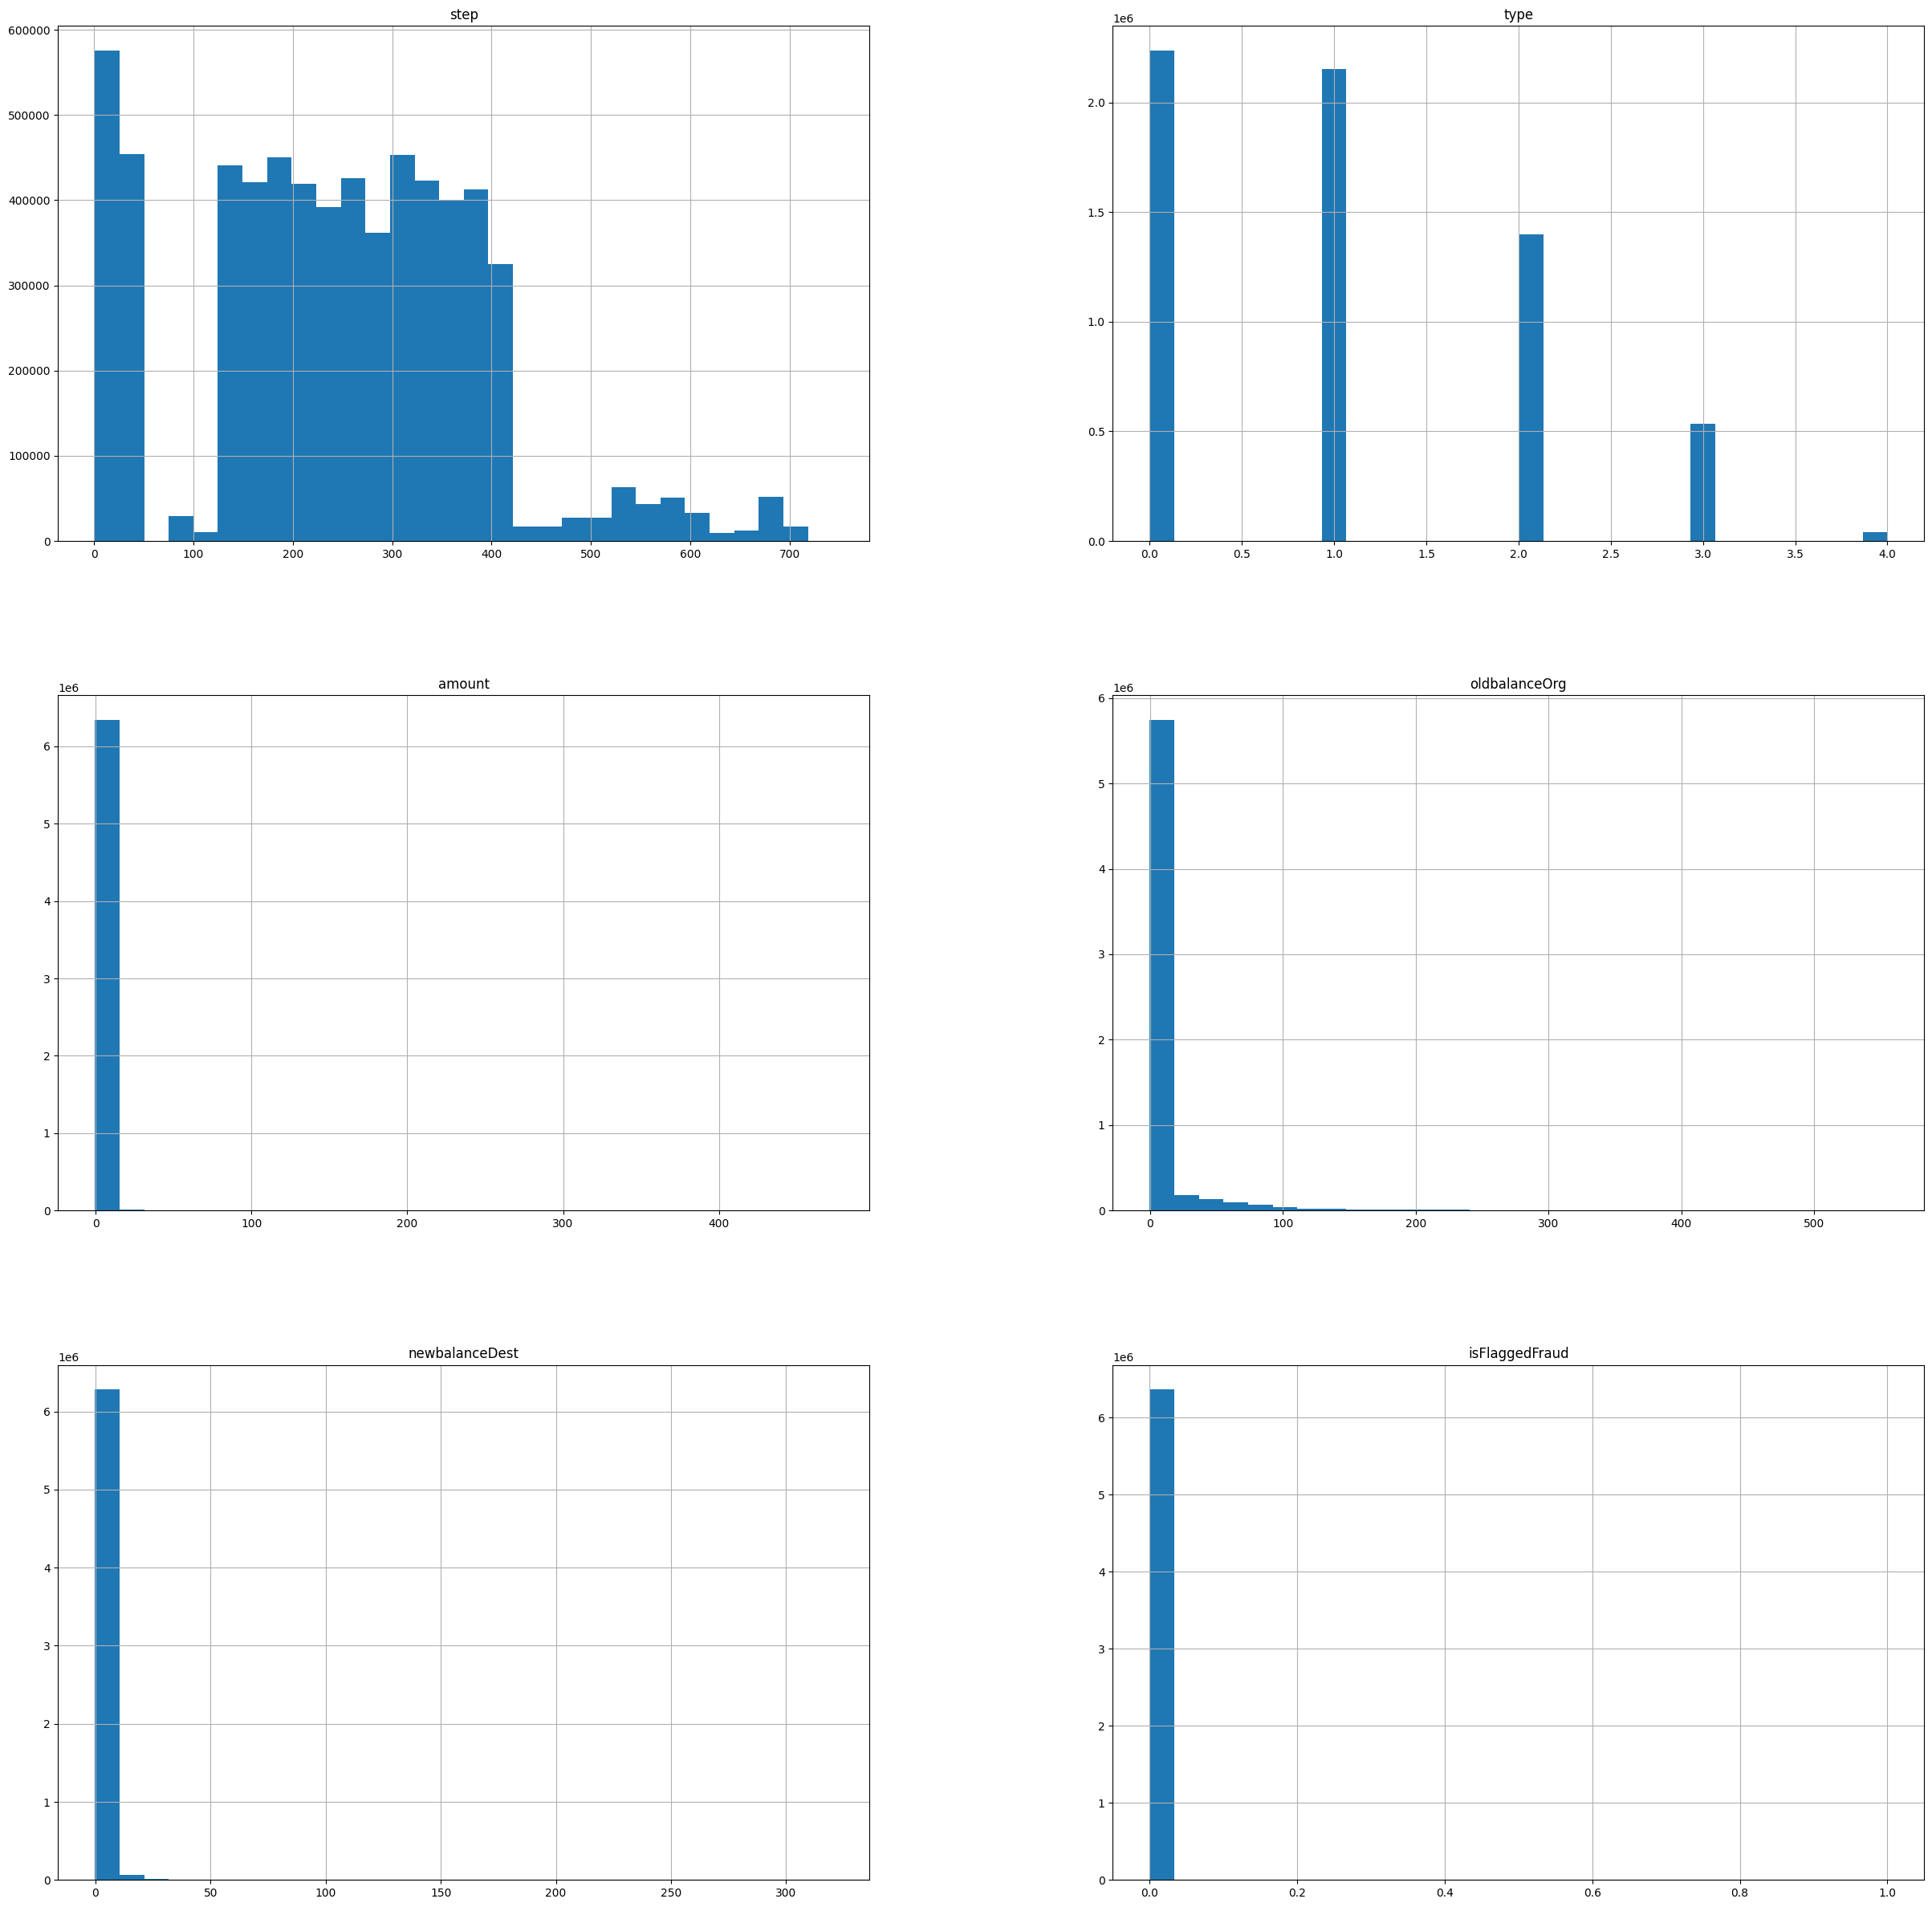

In [19]:
new_df
new_df.hist(bins=30, figsize=(30, 30))

In [20]:
missing_data = new_df.isnull().sum()
print(missing_data)


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


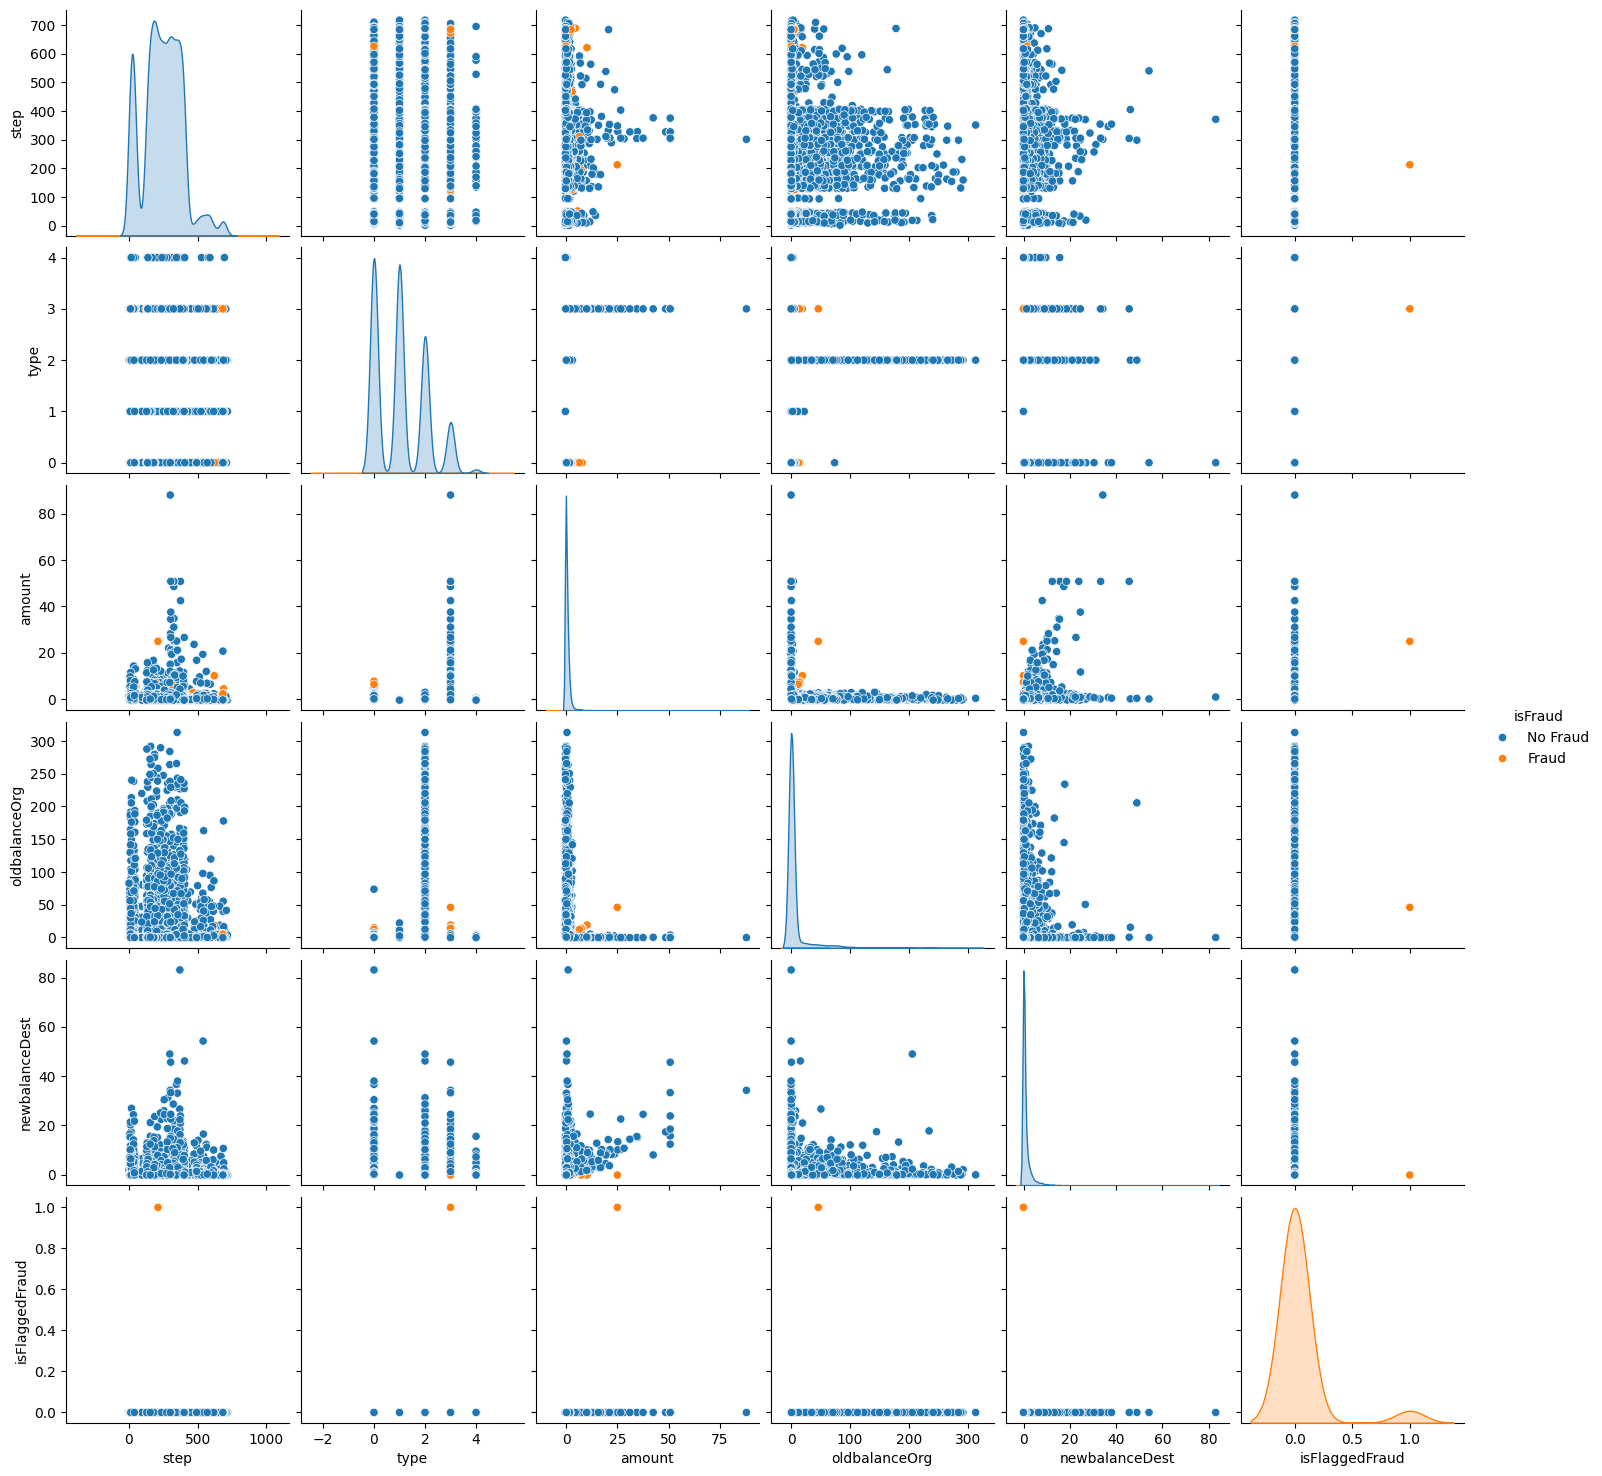

In [21]:
sampled_df = new_df.sample(n=10000, random_state=42)
sns.pairplot(sampled_df, hue='isFraud')

<Axes: xlabel='step', ylabel='count'>

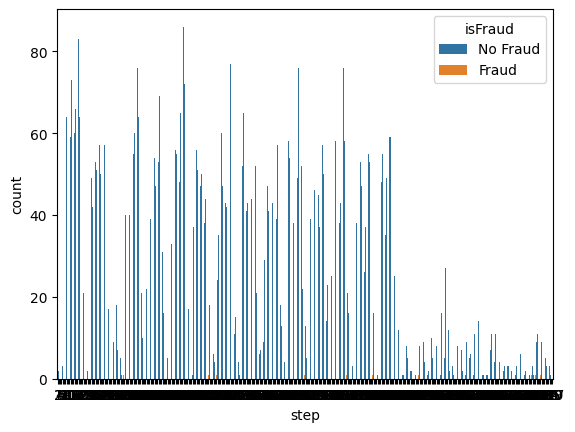

In [22]:
sns.countplot(data  = sampled_df, x = 'step', hue="isFraud")

<Axes: xlabel='type', ylabel='count'>

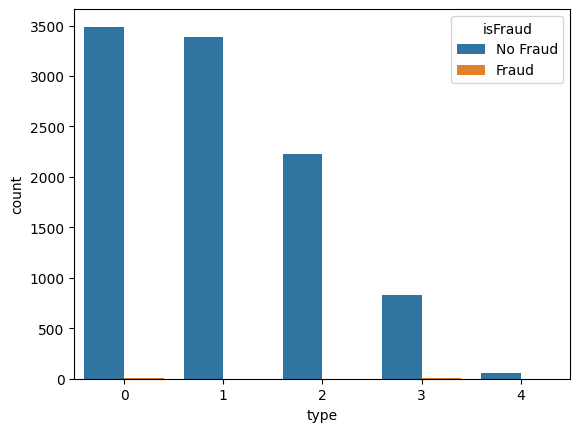

In [23]:
sns.countplot(data  = sampled_df, x = 'type', hue="isFraud")

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

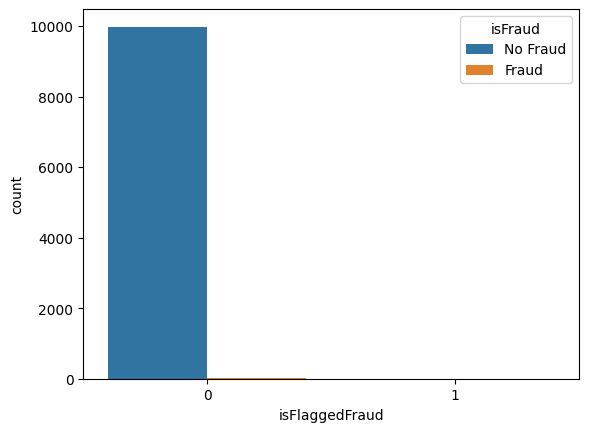

In [24]:
sns.countplot(data  = sampled_df, x = 'isFlaggedFraud', hue="isFraud")

In [25]:
# slit and train
X= new_df.drop(columns='isFraud')
y= new_df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)






In [ ]:
# clf = DecisionTreeClassifier()


# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))
# plt.figure(figsize=(12,12)) 
#precision: biết True bắt True
#recall: biết False bắt False

Accuracy: 0.9995371403604175
              precision    recall  f1-score   support

       Fraud       0.82      0.82      0.82      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.91      0.91      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [27]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

       Fraud       0.95      0.82      0.88       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.98      0.91      0.94    636262
weighted avg       1.00      1.00      1.00    636262

